In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [39]:
df=pd.read_csv("C:\\Users\\dobil\\OneDrive\\Desktop\\MACHINE-LEARNING\\bank_marketing_dataset.csv")
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [40]:
df=df[["age","job","balance","loan","contact","deposit"]]
df.head()

,age,job,balance,loan,contact,deposit
0,59,admin.,2343,no,unknown,yes
1,56,admin.,45,no,unknown,yes
2,41,technician,1270,no,unknown,yes
3,55,services,2476,no,unknown,yes
4,54,admin.,184,no,unknown,yes


In [41]:
def remove_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [42]:
df=remove_outliers("age")
df=remove_outliers("balance")

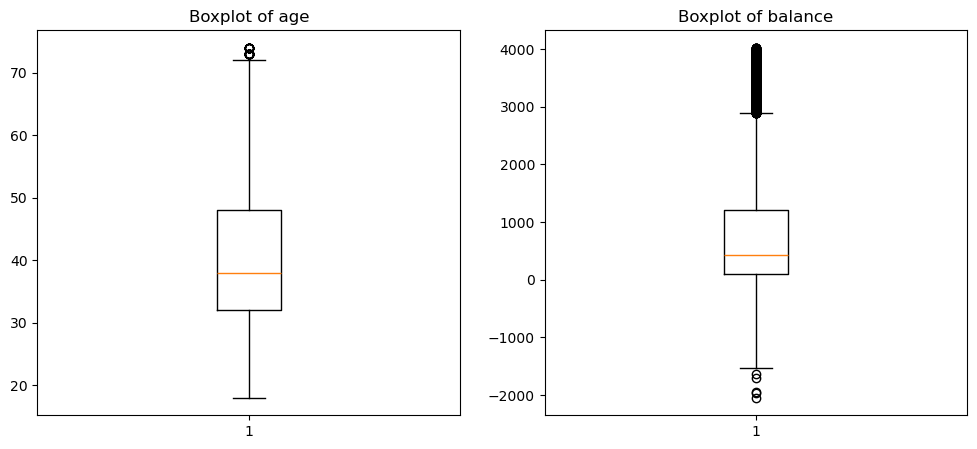

In [43]:
plt.figure(figsize=(12,5))
for i ,column in enumerate(["age","balance"]):
    plt.subplot(1,2,i+1)
    plt.boxplot(df[column])
    plt.title(f"Boxplot of {column}")
plt.show()

In [44]:
df.isna().sum()

age        0
job        0
balance    0
loan       0
contact    0
deposit    0
dtype: int64

In [45]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
df["loan"]=le.fit_transform(df["loan"])
df["deposit"]=le.fit_transform(df["deposit"])

df["job"]=le.fit_transform(df["job"])
df["contact"]=le.fit_transform(df["contact"])
df.head()

,age,job,balance,loan,contact,deposit
0,59,0,2343,0,2,1
1,56,0,45,0,2,1
2,41,9,1270,0,2,1
3,55,7,2476,0,2,1
4,54,0,184,0,2,1


In [46]:
x=df.drop("deposit",axis=1)
y=df["deposit"]

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

dtc=DecisionTreeClassifier(criterion='gini',max_depth=5)
dtc.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=5)

In [75]:
y_pred=dtc.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy:\n:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n:",confusion_matrix(y_test,y_pred))



Accuracy:
: 0.6323455549974887
Confusion Matrix:
: [[835 227]
 [505 424]]


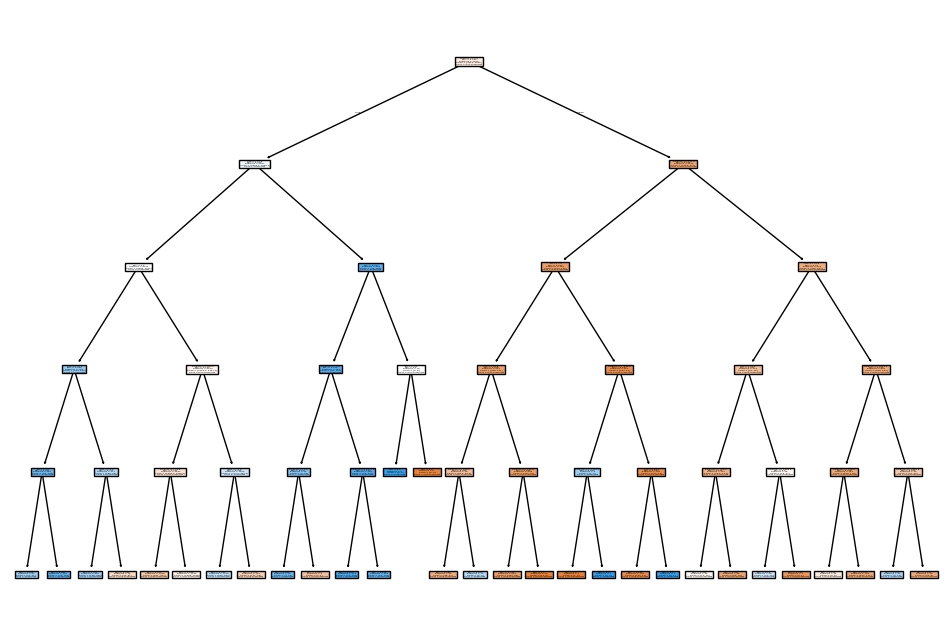

In [76]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(dtc,filled=True,feature_names=x.columns,class_names=["Not Subscribe","Subscribe"])
plt.show()